In [3]:
#our neural network class
import numpy
import scipy.special
import matplotlib.pyplot

class neuralNetwork:
    
    def __init__(self,no_of_Inodes,no_of_Hnodes,no_of_Onodes,learning_rate):
        self.inputnodes = no_of_Inodes
        self.hiddennodes = no_of_Hnodes
        self.outputnodes = no_of_Onodes
        self.lr = learning_rate
        
        self.w_input_hidden = numpy.random.normal(0.0,pow(self.inputnodes,-0.5),(self.hiddennodes,self.inputnodes))
        self.w_hidden_output = numpy.random.normal(0.0,pow(self.hiddennodes,-0.5),(self.outputnodes,self.hiddennodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # this function train our neural network
    #input_values and target_values are lists. It's not a single value
    def train(self, input_values,target_values):
        inputs = numpy.array(input_values,ndmin=2).T
        targets = numpy.array(target_values,ndmin=2).T
        
        hidden_inputs = numpy.dot(self.w_input_hidden,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.w_hidden_output, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.w_hidden_output.T,output_errors)
        
        self.w_hidden_output += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                                    numpy.transpose(hidden_outputs))
        
        self.w_input_hidden += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), 
                                                    numpy.transpose(inputs))
        pass
    
    #function to help us query from our neural network

    def query(self,inputs_list):

            inputs = numpy.array(inputs_list,ndmin=2).T

            signal_into_hidden_layer = numpy.dot(self.w_input_hidden,inputs)
            signal_from_hidden_layer = self.activation_function(signal_into_hidden_layer)

            signal_into_output_layer = numpy.dot(self.w_hidden_output,signal_from_hidden_layer)
            network_final_output = self.activation_function(signal_into_output_layer)

            return network_final_output
        
no_input_nodes = 784
no_hidden_nodes = 100
no_output_nodes = 10

learning_rate_value = 0.2

#creating an instance of the neural network class
n = neuralNetwork(no_input_nodes, no_hidden_nodes,no_output_nodes,learning_rate_value)

#loading our dataset
training_file = open("mnist_dataset/mnist_train.csv",'r')
training_list = training_file.readlines()
training_file.close()

#training our neural network 
for record in training_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(no_output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass
        

In [ ]:
import numpy
import matplotlib.pyplot

train_file = open("mnist_dataset/mnist_train_100.csv")
train_dataset = train_file.readlines()
train_file.close()
all_values = train_dataset[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys', interpolation='None')

In [ ]:
import numpy
train_file = open("mnist_dataset/mnist_train_100.csv")
train_dataset = train_file.readlines()
train_file.close()
all_values = train_dataset[0].split(',')
scaled_input = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
print(scaled_input)

In [ ]:
import numpy
train_file = open("mnist_dataset/mnist_train_100.csv")
train_dataset = train_file.readlines()
train_file.close()
all_values = train_dataset[0].split(',')
output_nodes = 10
targets = numpy.zeros(output_nodes) + 0.01
targets[int(all_values[0])] = 0.99
print(targets)

In [26]:
test_file = open("mnist_dataset/mnist_test_10.csv",'r')
test_dataset = test_file.readlines()
test_file.close()
all_values = test_dataset[4].split(',')
print(all_values[0])
n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01) 

4


array([[0.15449224],
       [0.0918423 ],
       [0.0806917 ],
       [0.14708242],
       [0.35012654],
       [0.05043975],
       [0.15278382],
       [0.18148702],
       [0.14343467],
       [0.04814019]])

In [6]:
#loading our full test dataset
test_file = open("mnist_dataset/mnist_test.csv",'r')
test_dataset = test_file.readlines()
test_file.close()

scorecard = []

#go through all the records in the test dataset
for record in test_dataset:
    all_values = record.split(',')
    #the correct value is the one in the first index (python uses 0 base index)
    label_we_want_to_predict = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    our_network_predicted_label = numpy.argmax(outputs)
    if(our_network_predicted_label== label_we_want_to_predict):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print("Network Accuracy",scorecard_array.sum()/scorecard_array.size)

Network Accuracy 0.9498


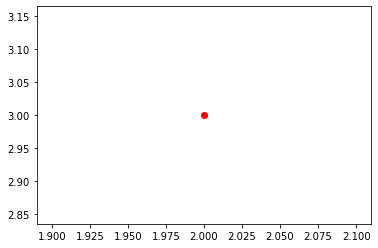

In [10]:
import matplotlib.pyplot as plt
plt.plot(2,3,'ro')

In [ ]:
learning_values = []
performance_values = []
learning_rate = 0
for e in range(0,10):

    learning_rate += 0.1
    learning_values.append(learning_rate)
    new_network = neuralNetwork(784, 100,10,learning_rate)

    training_file = open("mnist_dataset/mnist_train.csv",'r')
    training_list = training_file.readlines()
    training_file.close()
    
    for record in training_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(no_output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        new_network.train(inputs,targets)
        pass
    
    test_file = open("mnist_dataset/mnist_test.csv",'r')
    test_dataset = test_file.readlines()
    test_file.close()

    scorecard = []
    for record in test_dataset:
        all_values = record.split(',')
        label_we_want_to_predict = int(all_values[0])
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        outputs = new_network.query(inputs)
        our_network_predicted_label = numpy.argmax(outputs)
        if(our_network_predicted_label== label_we_want_to_predict):
            scorecard.append(1)
        else:
            scorecard.append(0)
            pass
        pass
    
    scorecard_array = numpy.asarray(scorecard)
    performance_values.append(scorecard_array.sum()/scorecard_array.size)
    
matplotlib.pyplot.plot(learning_values,performance_values,'go')
matplotlib.pyplot.plot(learning_values,performance_values,'-r')

Network Accuracy 0.8888888888888888


In [5]:
#Converting our own images to pixel values and saving it as csv

import glob
import numpy
import csv
import imageio

#converting images to excel for test dataset

our_own_dataset = []
for image_file_name in glob.glob('my_own_images/2828_my_own_' + '*' + '.png'):
    label = image_file_name[26:27]
    img_array = imageio.imread(image_file_name, as_gray=True)
    img_data = 255 - img_array.reshape(784)
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    pass

with open('my_own_images/2828_my_own.csv','w',newline="") as f:
    write = csv.writer(f)
    write.writerows(our_own_dataset)

In [ ]:
#TESTING OUR OWN IMAGES

import numpy
test_file = open("my_own_images/2828_my_own.csv",'r')
test_dataset = test_file.readlines()
test_file.close()

scorecard = []
for record in test_dataset:
    all_values = record.split(',')
    label_we_want_to_predict = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    our_network_predicted_label = numpy.argmax(outputs)
    if(our_network_predicted_label== label_we_want_to_predict):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print("Network Accuracy",scorecard_array.sum()/scorecard_array.size)